# Assignment 3

Shahar Oded - 208388918

Nir Rahav - 316275437

## Data

In [ ]:
import numpy as np

rng = np.random.RandomState(1)
X = np.linspace(0, 5, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(5 * X).ravel() + rng.normal(0, 0.1, X.shape[0])
data = np.column_stack((X, y))  # Combine X and y to form the dataset

# Data represented by (X,y)

##Q1

                MSE       MAE      RMSE        R2
max_depth                                        
2          0.464263  0.593073  0.681369  0.513446
3          0.210184  0.393781  0.458458  0.779724
4          0.133964  0.322546  0.366011  0.859604
5          0.069161  0.215040  0.262985  0.927518
6          0.065131  0.205029  0.255207  0.931742
7          0.038582  0.158593  0.196423  0.959566


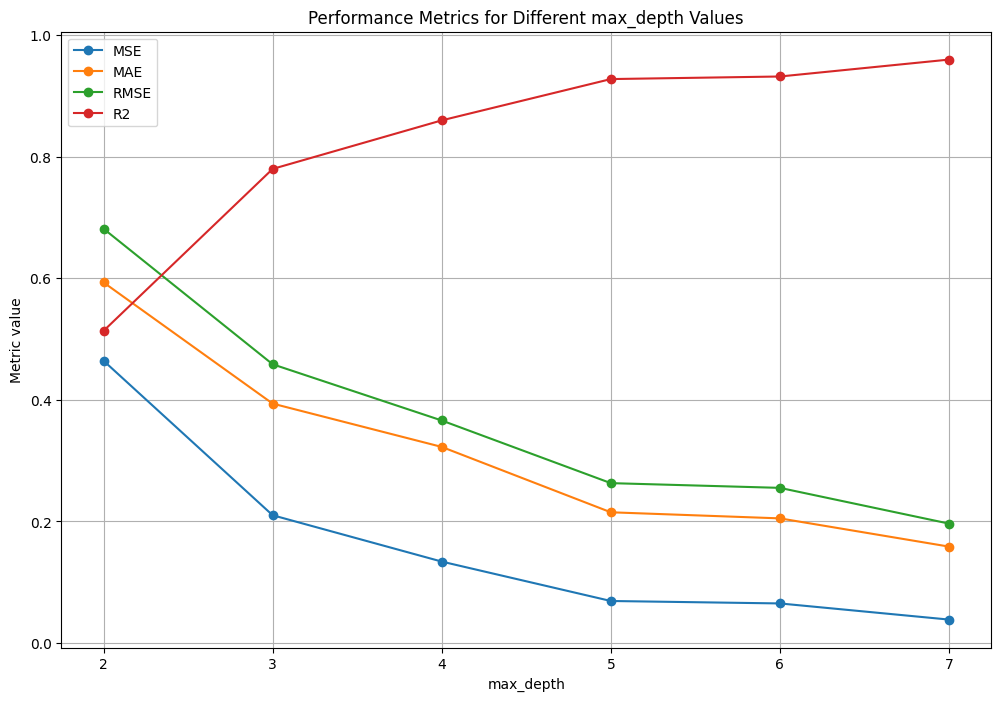

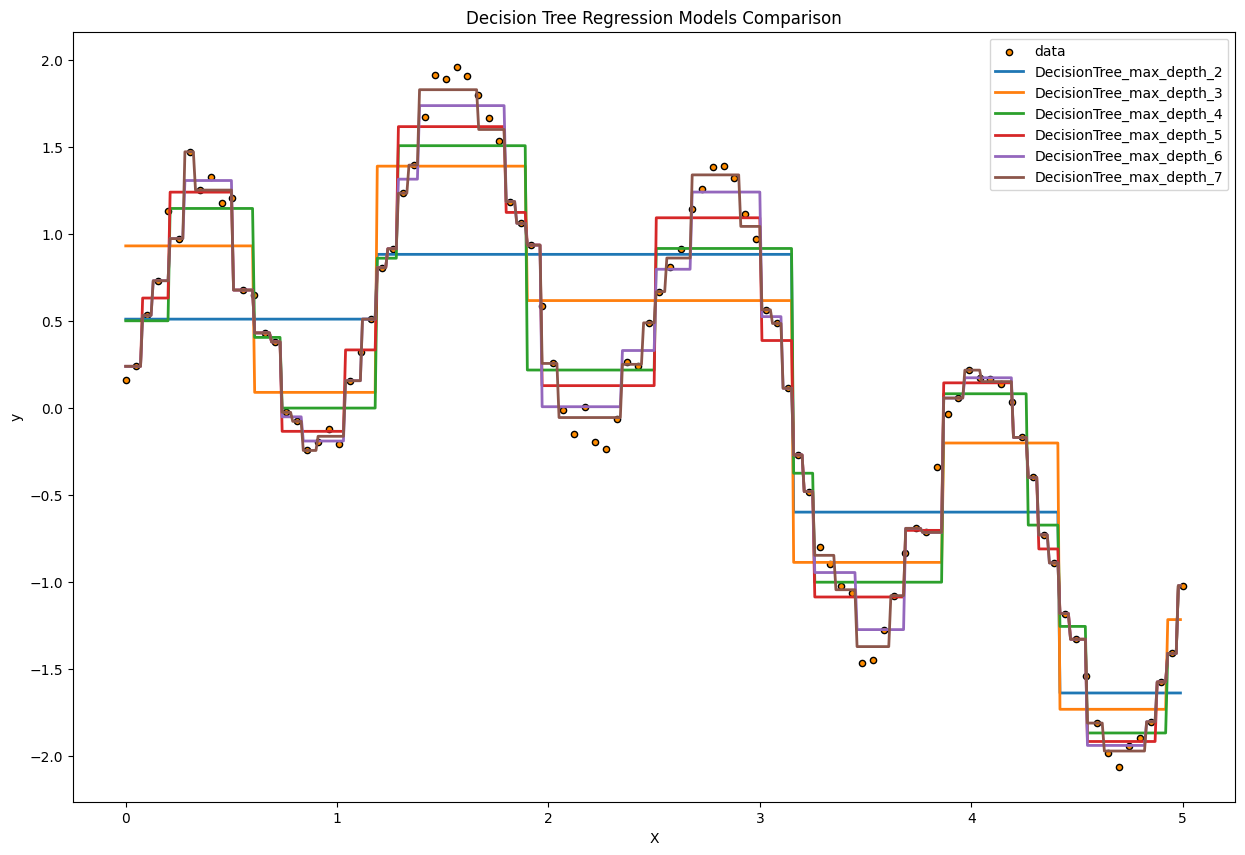

In [ ]:
# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Generate the data
rng = np.random.RandomState(1)
X = np.linspace(0, 5, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(5 * X).ravel() + rng.normal(0, 0.1, X.shape[0])
data = np.column_stack((X, y))  # Combine X and y to form the dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression models with different max_depth values
depths = [2, 3, 4, 5, 6, 7]
models = {f"DecisionTree_max_depth_{depth}": DecisionTreeRegressor(max_depth=depth) for depth in depths}

# Fit the models
for name, model in models.items():
    model.fit(X_train, y_train)

# Predict on the test set
test_predictions = {name: model.predict(X_test) for name, model in models.items()}

# Calculate and display quantitative metrics
metrics = {
    "MSE": mean_squared_error,
    "MAE": mean_absolute_error,
    "RMSE": lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    "R2": r2_score
}

results = {}
for name, y_test_pred in test_predictions.items():
    results[name] = {metric_name: metric_func(y_test, y_test_pred) for metric_name, metric_func in metrics.items()}

# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results).T
results_df['max_depth'] = depths
results_df = results_df.set_index('max_depth')
print(results_df)

# Plot the metrics
plt.figure(figsize=(12, 8))
plt.plot(results_df.index, results_df['MSE'], marker='o', label='MSE')
plt.plot(results_df.index, results_df['MAE'], marker='o', label='MAE')
plt.plot(results_df.index, results_df['RMSE'], marker='o', label='RMSE')
plt.plot(results_df.index, results_df['R2'], marker='o', label='R2')
plt.xlabel("max_depth")
plt.ylabel("Metric value")
plt.title("Performance Metrics for Different max_depth Values")
plt.legend()
plt.grid(True)
plt.show()

# Generate the data again for the plots
X_plot = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
predictions = {name: model.predict(X_plot) for name, model in models.items()}

# Plot the regression predictions
plt.figure(figsize=(15, 10))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
for name, y_pred in predictions.items():
    plt.plot(X_plot, y_pred, label=name, linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Decision Tree Regression Models Comparison")
plt.legend()
plt.show()


## Q2

Upload kmeans.py before runnign this block

In [ ]:
!pip install numpy matplotlib scikit-learn scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


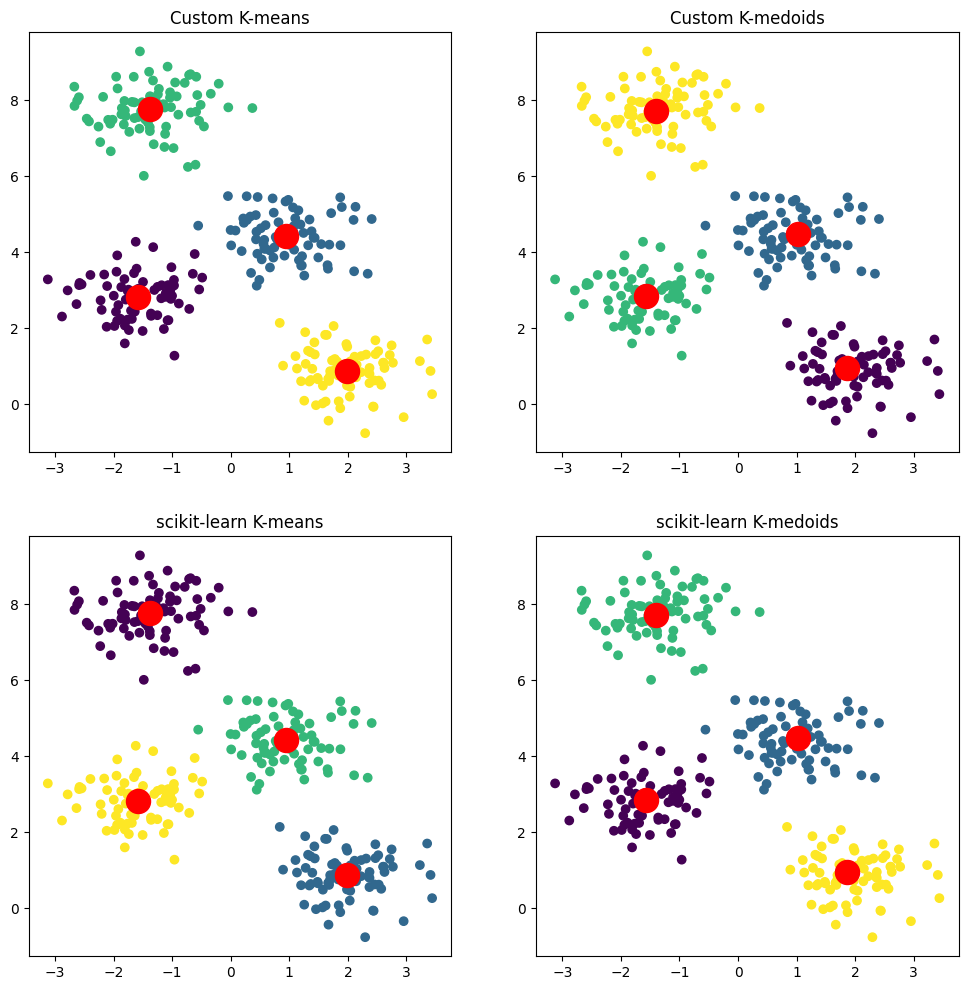

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def calculate_distances(data, centroids):
    return np.sqrt(((data[:, np.newaxis] - centroids)**2).sum(axis=2))

def update_centroids(data, clusters, k, algo):
    if algo == 'kmeans':
        return np.array([data[clusters == i].mean(axis=0) if len(data[clusters == i]) > 0 else np.zeros(data.shape[1]) for i in range(k)])

    elif algo == 'kmedoids':
        centroids = np.zeros((k, data.shape[1]))
        for i in range(k):
            cluster_points = data[clusters == i]
            if len(cluster_points) > 0:
                medoid_index = np.argmin(np.sum(np.linalg.norm(cluster_points[:, np.newaxis] - cluster_points, axis=2), axis=1))
                centroids[i] = cluster_points[medoid_index]
            else:
                centroids[i] = np.zeros(data.shape[1])
        return centroids


def check_convergence(new_centroids, centroids, tol):
    return np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol)

def k_means_medoids(data, k, algo='kmeans', max_iter=100, tol=0.0001):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iter):
        distances = calculate_distances(data, centroids)
        clusters = np.argmin(distances, axis=1)
        new_centroids = update_centroids(data, clusters, k, algo)
        if check_convergence(new_centroids, centroids, tol):
            break
        centroids = new_centroids
    return centroids, clusters

def sklearn_kmeans(data, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    return kmeans.cluster_centers_, kmeans.labels_

def sklearn_kmedoids(data, k):
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(data)
    return kmedoids.cluster_centers_, kmedoids.labels_

# Create synthetic data
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Custom K-means
centroids_custom, clusters_custom = k_means_medoids(data, 4, algo='kmeans')

# Custom K-medoids
centroids_custom_medoids, clusters_custom_medoids = k_means_medoids(data, 4, algo='kmedoids')

# scikit-learn K-means
centroids_sklearn, clusters_sklearn = sklearn_kmeans(data, 4)

# scikit-learn K-medoids
centroids_sklearn_medoids, clusters_sklearn_medoids = sklearn_kmedoids(data, 4)

# Plot results
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Custom K-means
axs[0, 0].scatter(data[:, 0], data[:, 1], c=clusters_custom, cmap='viridis')
axs[0, 0].scatter(centroids_custom[:, 0], centroids_custom[:, 1], s=300, c='red')
axs[0, 0].set_title('Custom K-means')

# Custom K-medoids
axs[0, 1].scatter(data[:, 0], data[:, 1], c=clusters_custom_medoids, cmap='viridis')
axs[0, 1].scatter(centroids_custom_medoids[:, 0], centroids_custom_medoids[:, 1], s=300, c='red')
axs[0, 1].set_title('Custom K-medoids')

# scikit-learn K-means
axs[1, 0].scatter(data[:, 0], data[:, 1], c=clusters_sklearn, cmap='viridis')
axs[1, 0].scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], s=300, c='red')
axs[1, 0].set_title('scikit-learn K-means')

# scikit-learn K-medoids
axs[1, 1].scatter(data[:, 0], data[:, 1], c=clusters_sklearn_medoids, cmap='viridis')
axs[1, 1].scatter(centroids_sklearn_medoids[:, 0], centroids_sklearn_medoids[:, 1], s=300, c='red')
axs[1, 1].set_title('scikit-learn K-medoids')

plt.show()


In [ ]:
from kmeans import *
# Example usage:
data = np.random.rand(100, 2)  # Example data
k = 3
algo = 'kmeans'  # or 'kmedoids'
centroids, clusters = k_means_medoids(data, k, algo)
print("Centroids:\n", centroids)
print("Clusters:\n", clusters)

print('\n')
algo = 'kmedoids'  # or 'kmedoids'
medoids, clusters = k_means_medoids(data, k, algo)
print("Medoids:\n", medoids)
print("Clusters:\n", clusters)

Centroids:
 [[0.8073945  0.28594608]
 [0.64115654 0.84327334]
 [0.27706088 0.31967976]]
Clusters:
 [0 1 0 2 0 1 0 1 0 2 1 1 2 0 0 1 1 1 1 0 2 0 1 0 1 1 2 2 0 2 2 0 2 0 0 2 2
 0 2 1 2 2 1 1 1 0 1 1 2 2 2 1 0 0 2 2 1 0 2 1 0 0 0 1 2 0 1 1 0 0 2 0 2 0
 2 2 1 0 2 0 1 1 2 1 0 1 2 0 1 1 1 0 2 1 0 0 2 2 1 2]


Medoids:
 [[0.84878706 0.18484073]
 [0.73457483 0.81136739]
 [0.36189216 0.28304101]]
Clusters:
 [0 1 0 2 2 1 0 1 2 2 1 1 2 0 1 1 1 1 1 0 2 1 1 0 1 1 2 2 0 2 2 0 2 0 1 2 2
 0 2 1 2 2 1 1 1 0 1 1 2 2 2 1 1 0 2 2 1 0 2 1 0 0 1 1 2 1 1 1 0 0 2 0 2 0
 2 2 1 0 2 0 1 1 2 1 0 1 2 0 1 1 1 0 2 1 0 0 2 2 2 2]


##Q3

In [ ]:
from collections import deque
import matplotlib.pyplot as plt

def calculate_distances(X):
  """
  Calculate the pairwise Euclidean distances between all points in the dataset.

  Parameters:
  X (numpy.ndarray): The input data array of shape (n_samples, n_features).

  Returns:
  numpy.ndarray: A distance matrix of shape (n_samples, n_samples) where each element (i, j)
                  represents the Euclidean distance between points i and j.
  """
  return np.sqrt(((X[:, np.newaxis] - X) ** 2).sum(axis=2))


class DBSCAN:
    def __init__(self, r, minPts):
        self.r = r
        self.minPts = minPts

    def fit(self, X):
        n = X.shape[0]
        labels = np.full(n, -1, dtype=object)  # Initialize labels as -1 (unclassified)
        cluster_id = 0

        # Calculate distances between points
        distances = calculate_distances(X)

        # Step 1: Identify core points and expand clusters
        for point_idx in range(n):
            if labels[point_idx] != -1:
                continue  # Skip already classified points

            neighbors = self.region_query(point_idx, distances)
            if len(neighbors) < self.minPts:
                labels[point_idx] = (-1, 'outlier')  # Mark as outlier initially
            else:
                cluster_id += 1
                self.expand_cluster(labels, point_idx, neighbors, cluster_id, distances)

        return labels

    def region_query(self, point_idx, distances):
        neighbors = np.where(distances[point_idx] <= self.r)[0]
        return neighbors

    def expand_cluster(self, labels, core_point, neighbors, cluster_id, distances):
        labels[core_point] = (cluster_id, 'core')  # Assign the core point to the current cluster
        search_queue = deque(neighbors)

        while search_queue:
            point_idx = search_queue.popleft()
            if labels[point_idx] == (-1, 'outlier'):  # If it was previously marked as outlier
                labels[point_idx] = (cluster_id, 'border')  # Change outlier to border point
            if labels[point_idx] != -1:
                continue  # Skip already classified points

            labels[point_idx] = (cluster_id, 'border')  # Assign the point to the current cluster

            point_neighbors = self.region_query(point_idx, distances)
            if len(point_neighbors) >= self.minPts:
                labels[point_idx] = (cluster_id, 'core')
                search_queue.extend(point_neighbors)

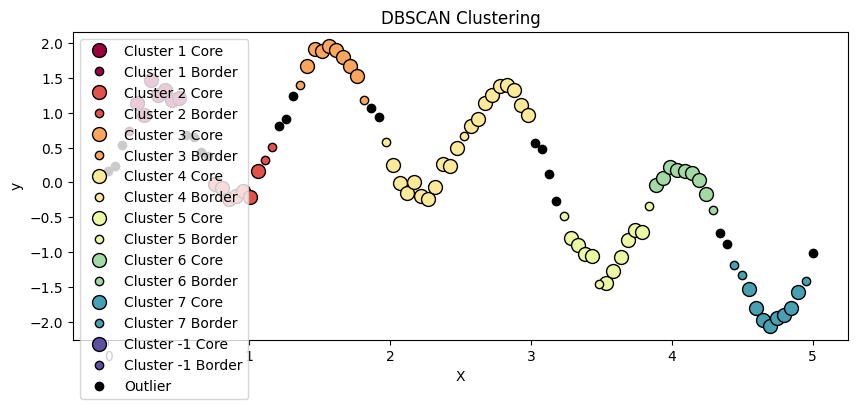

In [ ]:
# Parameters
r = 0.4  # Radius for neighborhood
minPts = 5  # Minimum points to form a dense region

# Initialize and fit DBSCAN
dbscan = DBSCAN(r=r, minPts=minPts)
labels = dbscan.fit(data)

# Plot results
plt.figure(figsize=(10, 4))
unique_labels = set([label[0] for label in labels])
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = [label[0] == k for label in labels]
    xy = data[class_member_mask]
    types = [label[1] for label in labels if label[0] == k]

    core_mask = [t == 'core' for t in types]
    border_mask = [t == 'border' for t in types]

    plt.plot(xy[core_mask, 0], xy[core_mask, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10, label=f'Cluster {k} Core')

    plt.plot(xy[border_mask, 0], xy[border_mask, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, label=f'Cluster {k} Border')

outlier_mask = [label[0] == -1 for label in labels]
xy_outliers = data[outlier_mask]
plt.plot(xy_outliers[:, 0], xy_outliers[:, 1], 'o', markerfacecolor='k',
         markeredgecolor='k', markersize=6, label='Outlier')

plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

In [ ]:
labels

array([(-1, 'outlier'), (-1, 'outlier'), (-1, 'outlier'), (1, 'border'),
       (1, 'core'), (1, 'core'), (1, 'core'), (1, 'core'), (1, 'core'),
       (1, 'core'), (1, 'core'), (-1, 'outlier'), (-1, 'outlier'),
       (-1, 'outlier'), (-1, 'outlier'), (2, 'core'), (2, 'core'),
       (2, 'core'), (2, 'core'), (2, 'core'), (2, 'core'), (2, 'core'),
       (2, 'border'), (2, 'border'), (-1, 'outlier'), (-1, 'outlier'),
       (-1, 'outlier'), (3, 'border'), (3, 'core'), (3, 'core'),
       (3, 'core'), (3, 'core'), (3, 'core'), (3, 'core'), (3, 'core'),
       (3, 'core'), (3, 'border'), (-1, 'outlier'), (-1, 'outlier'),
       (4, 'border'), (4, 'core'), (4, 'core'), (4, 'core'), (4, 'core'),
       (4, 'core'), (4, 'core'), (4, 'core'), (4, 'core'), (4, 'core'),
       (4, 'core'), (4, 'border'), (4, 'core'), (4, 'core'), (4, 'core'),
       (4, 'core'), (4, 'core'), (4, 'core'), (4, 'core'), (4, 'core'),
       (4, 'core'), (-1, 'outlier'), (-1, 'outlier'), (-1, 'outlier'),
       (-